In [355]:
import pandas as pd
import pandas_profiling
import re
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [356]:
df_train = pd.read_csv('./train.csv')
df_test = pd.read_csv('./test.csv')

In [357]:
df = df_train.append(df_test)

/home/thiago/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:6692: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort)


In [358]:
df_study = df.copy()

In [359]:
df_study['Age'] = pd.cut(df_study['Age'], bins=[0, 12, 18, 30, 50, 100])

In [360]:
df_study['Has_Cabin'] = df_study['Cabin'].fillna(0).apply(lambda x: 0 if x == 0 else 1)

In [361]:
df_study['FamilySize'] = df_study['SibSp'] + df_study['Parch'] + 1

In [362]:
df_study['IsAlone'] = df_study['FamilySize'].apply(lambda x: 1 if x == 1 else 0)

In [363]:
df_study['Fare'].describe(percentiles=[0.0, 0.4, 0.74, 0.80, 0.91, 1.0])

count    1308.000000
mean       33.295479
std        51.758668
min         0.000000
0%          0.000000
40%        10.500000
50%        14.454200
74%        30.500000
80%        41.579200
91%        79.650000
100%      512.329200
max       512.329200
Name: Fare, dtype: float64

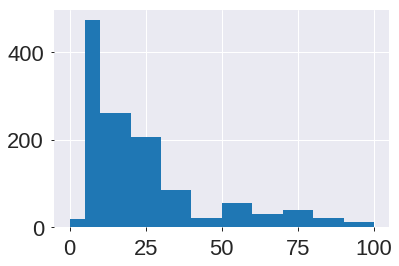

In [364]:
df_study['Fare'].hist(bins=[0,5,10,20,30,40,50,60, 70, 80, 90, 100])

In [365]:
df_study['CategoricalFare'] = pd.qcut(df_study['Fare'], q=[0.0, 0.4,0.74,0.80,0.91, 1.0])

In [366]:
df_study.dropna(subset=['Embarked'], inplace=True)

In [367]:
df_study['Embarked'] = df_study['Embarked'].map( {'S': 0, 'C': 1, 'Q': 2} ).astype(int)

In [368]:
df_study['Sex'] = df_study['Sex'].map( {'male': 0, 'female': 1} ).astype(int)

In [369]:
df_study.sample(50)

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,Has_Cabin,FamilySize,IsAlone,CategoricalFare
127,"(18.0, 30.0]",NaN,0,7.1417,"Madsen, Mr. Fridtjof Arne",0,128,3,0,0,1.0,C 17369,0,1,1,"(-0.001, 10.5]"
455,"(18.0, 30.0]",NaN,1,7.8958,"Jalsevac, Mr. Ivan",0,456,3,0,0,1.0,349240,0,1,1,"(-0.001, 10.5]"
834,"(12.0, 18.0]",NaN,0,8.3000,"Allum, Mr. Owen George",0,835,3,0,0,0.0,2223,0,1,1,"(-0.001, 10.5]"
890,"(30.0, 50.0]",NaN,2,7.7500,"Dooley, Mr. Patrick",0,891,3,0,0,0.0,370376,0,1,1,"(-0.001, 10.5]"
185,"(30.0, 50.0]",NaN,0,16.0000,"Maybery, Mr. Frank Hubert",0,1077,2,0,0,NaN,239059,0,1,1,"(10.5, 30.5]"
274,NaN,NaN,2,7.7500,"Healy, Miss. Hanora ""Nora""",0,275,3,1,0,1.0,370375,0,1,1,"(-0.001, 10.5]"
387,"(50.0, 100.0]",NaN,0,13.0000,"Ashby, Mr. John",0,1279,2,0,0,NaN,244346,0,1,1,"(10.5, 30.5]"
531,NaN,NaN,1,7.2292,"Toufik, Mr. Nakli",0,532,3,0,0,0.0,2641,0,1,1,"(-0.001, 10.5]"
844,"(12.0, 18.0]",NaN,0,8.6625,"Culumovic, Mr. Jeso",0,845,3,0,0,0.0,315090,0,1,1,"(-0.001, 10.5]"
869,"(0.0, 12.0]",NaN,0,11.1333,"Johnson, Master. Harold Theodor",1,870,3,0,1,1.0,347742,0,3,0,"(10.5, 30.5]"


In [370]:
df_study['HasCharInTicket'] = ~(df_study['Ticket'].apply(lambda x: x.split()[-1]) == df_study['Ticket'])

In [371]:
temp.nunique()

678

In [372]:
df_study['Ticket'].nunique()

928

In [373]:
df_study

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,Has_Cabin,FamilySize,IsAlone,CategoricalFare,HasCharInTicket
0,"(18.0, 30.0]",NaN,0,7.2500,"Braund, Mr. Owen Harris",0,1,3,0,1,0.0,A/5 21171,0,2,0,"(-0.001, 10.5]",True
1,"(30.0, 50.0]",C85,1,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,1,1,1.0,PC 17599,1,2,0,"(41.579, 79.65]",True
2,"(18.0, 30.0]",NaN,0,7.9250,"Heikkinen, Miss. Laina",0,3,3,1,0,1.0,STON/O2. 3101282,0,1,1,"(-0.001, 10.5]",True
3,"(30.0, 50.0]",C123,0,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,1,1,1.0,113803,1,2,0,"(41.579, 79.65]",False
4,"(30.0, 50.0]",NaN,0,8.0500,"Allen, Mr. William Henry",0,5,3,0,0,0.0,373450,0,1,1,"(-0.001, 10.5]",False
5,NaN,NaN,2,8.4583,"Moran, Mr. James",0,6,3,0,0,0.0,330877,0,1,1,"(-0.001, 10.5]",False
6,"(50.0, 100.0]",E46,0,51.8625,"McCarthy, Mr. Timothy J",0,7,1,0,0,0.0,17463,1,1,1,"(41.579, 79.65]",False
7,"(0.0, 12.0]",NaN,0,21.0750,"Palsson, Master. Gosta Leonard",1,8,3,0,3,0.0,349909,0,5,0,"(10.5, 30.5]",False
8,"(18.0, 30.0]",NaN,0,11.1333,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",2,9,3,1,0,1.0,347742,0,3,0,"(10.5, 30.5]",False
9,"(12.0, 18.0]",NaN,1,30.0708,"Nasser, Mrs. Nicholas (Adele Achem)",0,10,2,1,1,1.0,237736,0,2,0,"(10.5, 30.5]",False


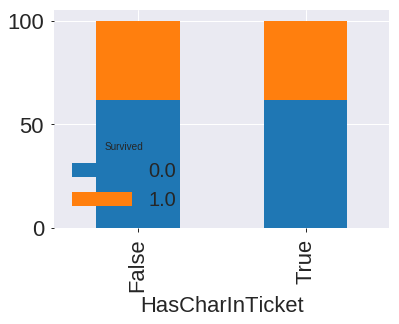

In [374]:
df_study.groupby(['HasCharInTicket', 'Survived'], as_index=False).size().groupby(level=0).apply(
    lambda x: x * 100 / x.sum()
).unstack().plot(kind='bar', stacked=True)

In [375]:
df_study.drop(columns=['HasCharInTicket'], inplace=True)

In [376]:
df_study

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,Has_Cabin,FamilySize,IsAlone,CategoricalFare
0,"(18.0, 30.0]",NaN,0,7.2500,"Braund, Mr. Owen Harris",0,1,3,0,1,0.0,A/5 21171,0,2,0,"(-0.001, 10.5]"
1,"(30.0, 50.0]",C85,1,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,1,1,1.0,PC 17599,1,2,0,"(41.579, 79.65]"
2,"(18.0, 30.0]",NaN,0,7.9250,"Heikkinen, Miss. Laina",0,3,3,1,0,1.0,STON/O2. 3101282,0,1,1,"(-0.001, 10.5]"
3,"(30.0, 50.0]",C123,0,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,1,1,1.0,113803,1,2,0,"(41.579, 79.65]"
4,"(30.0, 50.0]",NaN,0,8.0500,"Allen, Mr. William Henry",0,5,3,0,0,0.0,373450,0,1,1,"(-0.001, 10.5]"
5,NaN,NaN,2,8.4583,"Moran, Mr. James",0,6,3,0,0,0.0,330877,0,1,1,"(-0.001, 10.5]"
6,"(50.0, 100.0]",E46,0,51.8625,"McCarthy, Mr. Timothy J",0,7,1,0,0,0.0,17463,1,1,1,"(41.579, 79.65]"
7,"(0.0, 12.0]",NaN,0,21.0750,"Palsson, Master. Gosta Leonard",1,8,3,0,3,0.0,349909,0,5,0,"(10.5, 30.5]"
8,"(18.0, 30.0]",NaN,0,11.1333,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",2,9,3,1,0,1.0,347742,0,3,0,"(10.5, 30.5]"
9,"(12.0, 18.0]",NaN,1,30.0708,"Nasser, Mrs. Nicholas (Adele Achem)",0,10,2,1,1,1.0,237736,0,2,0,"(10.5, 30.5]"


In [377]:
def get_title(name):
    title_search = re.search('([A-Za-z]+)\.', name)
    if title_search:
        return title_search.group(1)
    return ""

In [378]:
df_study['Title'] = df_study['Name'].apply(get_title)

In [379]:
df_study['Title'] = df_study['Title'].replace(['Lady', 'Countess','Capt', 'Col','Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
df_study['Title'] = df_study['Title'].replace('Mlle', 'Miss')
df_study['Title'] = df_study['Title'].replace('Ms', 'Miss')
df_study['Title'] = df_study['Title'].replace('Mme', 'Mrs')

In [380]:
title_mapping = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5}
df_study['Title'] = df_study['Title'].map(title_mapping)
df_study['Title'] = df_study['Title'].fillna(0)

In [381]:
df_study

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,Has_Cabin,FamilySize,IsAlone,CategoricalFare,Title
0,"(18.0, 30.0]",NaN,0,7.2500,"Braund, Mr. Owen Harris",0,1,3,0,1,0.0,A/5 21171,0,2,0,"(-0.001, 10.5]",1
1,"(30.0, 50.0]",C85,1,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,1,1,1.0,PC 17599,1,2,0,"(41.579, 79.65]",3
2,"(18.0, 30.0]",NaN,0,7.9250,"Heikkinen, Miss. Laina",0,3,3,1,0,1.0,STON/O2. 3101282,0,1,1,"(-0.001, 10.5]",2
3,"(30.0, 50.0]",C123,0,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,1,1,1.0,113803,1,2,0,"(41.579, 79.65]",3
4,"(30.0, 50.0]",NaN,0,8.0500,"Allen, Mr. William Henry",0,5,3,0,0,0.0,373450,0,1,1,"(-0.001, 10.5]",1
5,NaN,NaN,2,8.4583,"Moran, Mr. James",0,6,3,0,0,0.0,330877,0,1,1,"(-0.001, 10.5]",1
6,"(50.0, 100.0]",E46,0,51.8625,"McCarthy, Mr. Timothy J",0,7,1,0,0,0.0,17463,1,1,1,"(41.579, 79.65]",1
7,"(0.0, 12.0]",NaN,0,21.0750,"Palsson, Master. Gosta Leonard",1,8,3,0,3,0.0,349909,0,5,0,"(10.5, 30.5]",4
8,"(18.0, 30.0]",NaN,0,11.1333,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",2,9,3,1,0,1.0,347742,0,3,0,"(10.5, 30.5]",3
9,"(12.0, 18.0]",NaN,1,30.0708,"Nasser, Mrs. Nicholas (Adele Achem)",0,10,2,1,1,1.0,237736,0,2,0,"(10.5, 30.5]",3


In [382]:
df_study['Age'] = df_study['Age'].astype('category').cat.codes
df_study['Fare'] = df_study['CategoricalFare'].astype('category').cat.codes

In [383]:
df_study

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,Has_Cabin,FamilySize,IsAlone,CategoricalFare,Title
0,2,NaN,0,0,"Braund, Mr. Owen Harris",0,1,3,0,1,0.0,A/5 21171,0,2,0,"(-0.001, 10.5]",1
1,3,C85,1,3,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,1,1,1.0,PC 17599,1,2,0,"(41.579, 79.65]",3
2,2,NaN,0,0,"Heikkinen, Miss. Laina",0,3,3,1,0,1.0,STON/O2. 3101282,0,1,1,"(-0.001, 10.5]",2
3,3,C123,0,3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,1,1,1.0,113803,1,2,0,"(41.579, 79.65]",3
4,3,NaN,0,0,"Allen, Mr. William Henry",0,5,3,0,0,0.0,373450,0,1,1,"(-0.001, 10.5]",1
5,-1,NaN,2,0,"Moran, Mr. James",0,6,3,0,0,0.0,330877,0,1,1,"(-0.001, 10.5]",1
6,4,E46,0,3,"McCarthy, Mr. Timothy J",0,7,1,0,0,0.0,17463,1,1,1,"(41.579, 79.65]",1
7,0,NaN,0,1,"Palsson, Master. Gosta Leonard",1,8,3,0,3,0.0,349909,0,5,0,"(10.5, 30.5]",4
8,2,NaN,0,1,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",2,9,3,1,0,1.0,347742,0,3,0,"(10.5, 30.5]",3
9,1,NaN,1,1,"Nasser, Mrs. Nicholas (Adele Achem)",0,10,2,1,1,1.0,237736,0,2,0,"(10.5, 30.5]",3


In [384]:
df_study.drop(columns=['PassengerId', 'Name', 'Ticket','Cabin', 'CategoricalFare'], inplace=True)

In [385]:
df_study = pd.concat([df_study, pd.get_dummies(df_study['Age'], prefix='Age')], axis=1)

In [386]:
df_study = pd.concat([df_study, pd.get_dummies(df_study['Title'], prefix='Title')], axis=1)

In [387]:
df_study = pd.concat([df_study, pd.get_dummies(df_study['Pclass'], prefix='Pclass')], axis=1)

In [388]:
df_study = pd.concat([df_study, pd.get_dummies(df_study['Fare'], prefix='Fare')], axis=1)

In [389]:
df_study = pd.concat([df_study, pd.get_dummies(df_study['Embarked'], prefix='Embarked')], axis=1)

In [390]:
df_study.drop(columns=['Age', 'Embarked', 'Title', 'Pclass', 'Fare'], inplace=True)

In [391]:
df_study['Fare_-1'] = df_study['Fare_-1'].fillna(0)

In [441]:
train = df_study.iloc[:df_train.shape[0]-2]
test = df_study.iloc[df_train.shape[0]-2:]

In [442]:
train.columns

Index(['Parch', 'Sex', 'SibSp', 'Survived', 'Has_Cabin', 'FamilySize',
       'IsAlone', 'Age_-1', 'Age_0', 'Age_1', 'Age_2', 'Age_3', 'Age_4',
       'Title_1', 'Title_2', 'Title_3', 'Title_4', 'Title_5', 'Pclass_1',
       'Pclass_2', 'Pclass_3', 'Fare_-1', 'Fare_0', 'Fare_1', 'Fare_2',
       'Fare_3', 'Fare_4', 'Embarked_0', 'Embarked_1', 'Embarked_2'],
      dtype='object')

In [443]:
train.shape

(889, 30)

In [444]:
train.profile_report()

In [445]:
train.corr()

,Parch,Sex,SibSp,Survived,Has_Cabin,FamilySize,IsAlone,Age_-1,Age_0,Age_1,...,Pclass_3,Fare_-1,Fare_0,Fare_1,Fare_2,Fare_3,Fare_4,Embarked_0,Embarked_1,Embarked_2
Parch,1.000000,0.247508,0.414542,0.083151,0.039101,0.782988,-0.583112,-0.124701,0.368162,0.032261,...,0.014634,NaN,-0.359978,0.105780,0.283545,0.082189,0.119681,0.061512,-0.011588,-0.081585
Sex,0.247508,1.000000,0.116348,0.541585,0.135589,0.203191,-0.306985,-0.053823,0.068566,0.100048,...,-0.134227,NaN,-0.256040,0.111373,0.016606,0.055498,0.187950,-0.121405,0.084520,0.075217
SibSp,0.414542,0.116348,1.000000,-0.034040,-0.038657,0.890654,-0.584186,0.018436,0.353797,0.035238,...,0.091515,NaN,-0.336672,0.056502,0.195427,0.258508,0.041382,0.069438,-0.060074,-0.026692
Survived,0.083151,0.541585,-0.034040,1.000000,0.313435,0.018277,-0.206207,-0.090967,0.117741,0.027744,...,-0.320171,NaN,-0.295868,0.097244,-0.009943,0.113988,0.240459,-0.151777,0.169966,0.004536
Has_Cabin,0.039101,0.135589,-0.038657,0.313435,1.000000,-0.006888,-0.162116,-0.142636,-0.046936,-0.038926,...,-0.537496,NaN,-0.368541,-0.115684,0.050173,0.330284,0.439090,-0.104121,0.211375,-0.128805
FamilySize,0.782988,0.203191,0.890654,0.018277,-0.006888,1.000000,-0.690654,-0.049703,0.425779,0.040205,...,0.069865,NaN,-0.409985,0.091472,0.275250,0.217764,0.088083,0.078197,-0.046852,-0.059007
IsAlone,-0.583112,-0.306985,-0.584186,-0.206207,-0.162116,-0.690654,1.000000,0.152384,-0.339433,-0.069328,...,0.131775,NaN,0.549525,-0.238617,-0.144015,-0.220430,-0.195753,0.027982,-0.094513,0.087099
Age_-1,-0.124701,-0.053823,0.018436,-0.090967,-0.142636,-0.049703,0.152384,1.000000,-0.144632,-0.145765,...,0.216637,NaN,0.158901,-0.076961,-0.057884,-0.019184,-0.078859,-0.240960,0.032747,0.337199
Age_0,0.368162,0.068566,0.353797,0.117741,-0.046936,0.425779,-0.339433,-0.144632,1.000000,-0.084806,...,0.083623,NaN,-0.223872,0.165574,0.239615,-0.060292,-0.026534,0.037784,-0.021900,-0.029540
Age_1,0.032261,0.100048,0.035238,0.027744,-0.038926,0.040205,-0.069328,-0.145765,-0.084806,1.000000,...,0.061637,NaN,0.037534,-0.041487,-0.005733,-0.020980,0.032857,-0.015971,0.040237,-0.030633


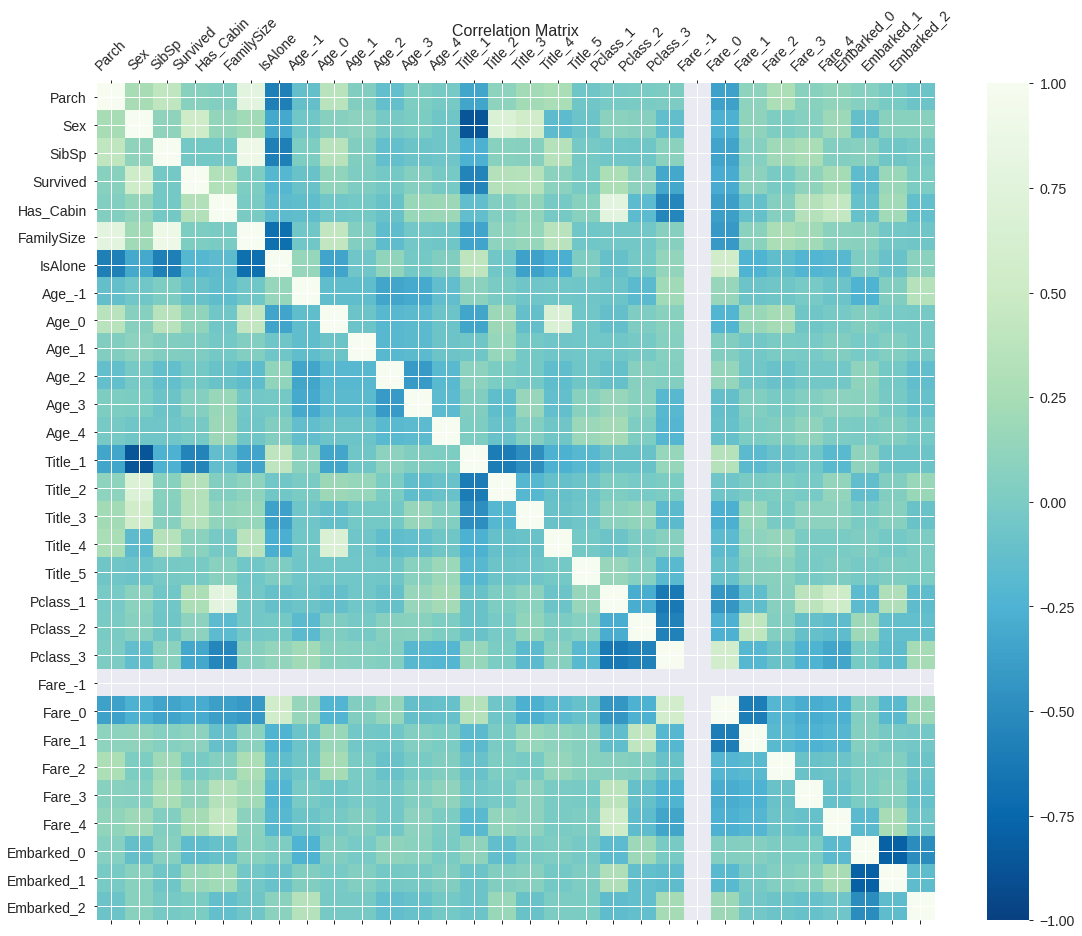

In [446]:
f = plt.figure(figsize=(19, 15))
plt.matshow(train.corr(), fignum=f.number,vmin=-1, vmax=1, cmap='GnBu_r')
plt.xticks(range(train.shape[1]), train.columns, fontsize=14, rotation=45)
plt.yticks(range(train.shape[1]), train.columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix', fontsize=16);

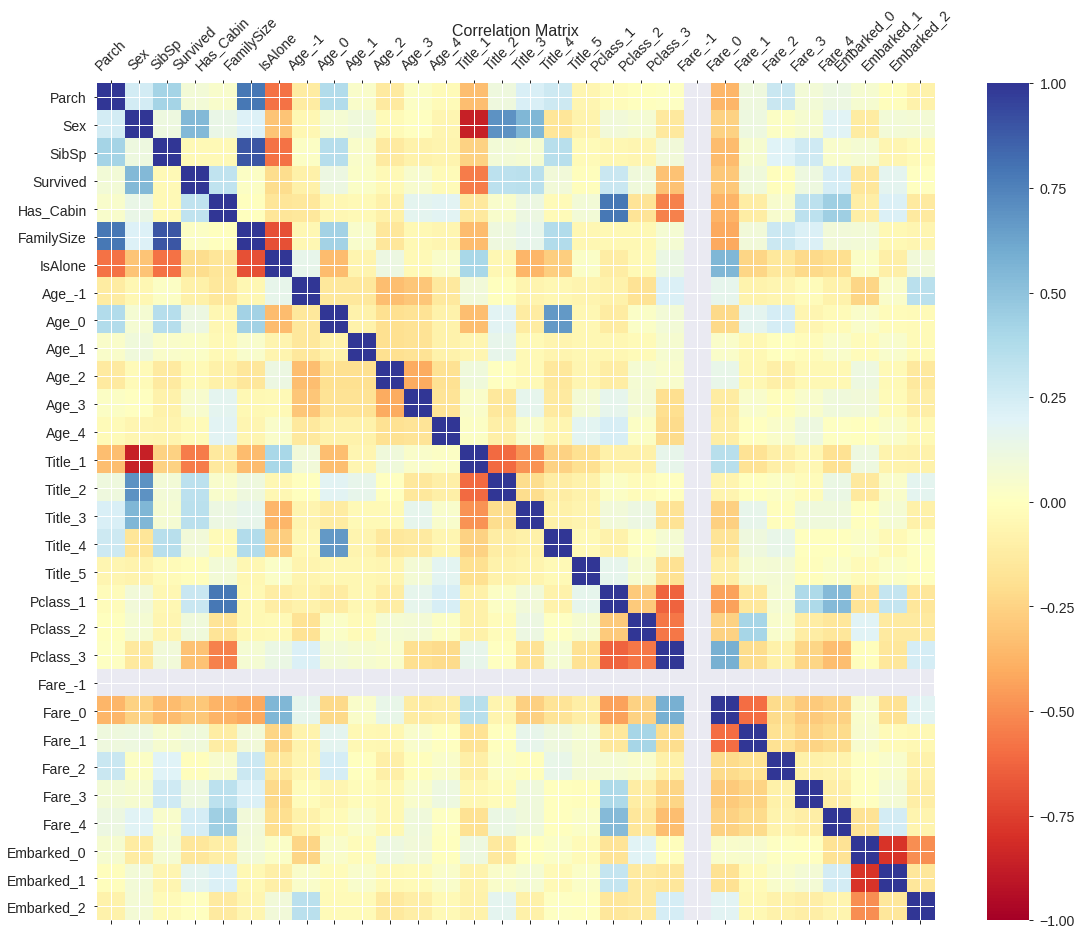

In [447]:
f = plt.figure(figsize=(19, 15))
plt.matshow(train.corr(), fignum=f.number,vmin=-1, vmax=1, cmap='RdYlBu')
plt.xticks(range(train.shape[1]), train.columns, fontsize=14, rotation=45)
plt.yticks(range(train.shape[1]), train.columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix', fontsize=16);

In [448]:
test.drop(columns='Survived', inplace=True)

/home/thiago/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [452]:
target = train['Survived'].astype(int)

In [453]:
train.drop(columns='Survived', inplace=True)

In [454]:
from keras.layers import Dense, Dropout
from keras.models import Input, Model
from keras.callbacks import ModelCheckpoint

In [473]:
def MLP(n_features, num_classes, n_unit=[], dropout=0.0):
    index = 0
    input_layer = Input(name='input_layer', shape=(n_features,))
    x = Dense(units=n_unit[index], activation='relu')(input_layer)
    index += 1
    while index < len(n_unit):
        x = Dense(units=n_unit[index], activation='relu')(x)
        x = Dropout(rate=dropout)(x)
        index += 1
    output_layer = Dense(units=num_classes, activation='sigmoid')(x)
    return Model(input_layer, output_layer)

In [474]:
models = [
    [13],
    [89],
    [233],
    [2584],
    [55, 233],
    [144, 610],
    [13, 55],
    [89, 89],
    [55, 89, 144, 233, 377],
    [89, 233, 610],
    [89, 233, 89],
    [34, 55, 34, 55]
]

In [476]:
for layer in models:
    m = MLP(29, 1, layer, 0.2)
    m.summary()
    m.compile(loss='binary_crossentropy', optimizer='Adam', metrics=['accuracy'])
    callback_list = [ModelCheckpoint(f'best_model_{str(layer)}', monitor='val_loss', verbose=1, save_best_only=True)]
    m.fit(train, target, batch_size=8, verbose=1, validation_split=0.2, epochs=200, shuffle=True, callbacks=callback_list)

Model: "model_45"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_layer (InputLayer)     (None, 29)                0         
_________________________________________________________________
dense_136 (Dense)            (None, 13)                390       
_________________________________________________________________
dense_137 (Dense)            (None, 1)                 14        
Total params: 404
Trainable params: 404
Non-trainable params: 0
_________________________________________________________________
Train on 711 samples, validate on 178 samples
Epoch 1/200
711/711 [==============================] - 0s 307us/step - loss: 0.6570 - accuracy: 0.6371 - val_loss: 0.5827 - val_accuracy: 0.7584

Epoch 00001: val_loss improved from inf to 0.58273, saving model to best_model_[13]
Epoch 2/200
711/711 [==============================] - 0s 196us/step - loss: 0.5671 - accuracy: 0.7511 - val_loss:


Epoch 00034: val_loss did not improve from 0.33252
Epoch 35/200
711/711 [==============================] - 0s 193us/step - loss: 0.3999 - accuracy: 0.8340 - val_loss: 0.3362 - val_accuracy: 0.8820

Epoch 00035: val_loss did not improve from 0.33252
Epoch 36/200
711/711 [==============================] - 0s 190us/step - loss: 0.3984 - accuracy: 0.8312 - val_loss: 0.3355 - val_accuracy: 0.8820

Epoch 00036: val_loss did not improve from 0.33252
Epoch 37/200
711/711 [==============================] - 0s 186us/step - loss: 0.3982 - accuracy: 0.8256 - val_loss: 0.3274 - val_accuracy: 0.8876

Epoch 00037: val_loss improved from 0.33252 to 0.32738, saving model to best_model_[13]
Epoch 38/200
711/711 [==============================] - 0s 190us/step - loss: 0.3982 - accuracy: 0.8312 - val_loss: 0.3295 - val_accuracy: 0.8820

Epoch 00038: val_loss did not improve from 0.32738
Epoch 39/200
711/711 [==============================] - 0s 185us/step - loss: 0.3969 - accuracy: 0.8284 - val_loss: 0.3

711/711 [==============================] - 0s 206us/step - loss: 0.3826 - accuracy: 0.8326 - val_loss: 0.3296 - val_accuracy: 0.8596

Epoch 00075: val_loss did not improve from 0.32418
Epoch 76/200
711/711 [==============================] - 0s 198us/step - loss: 0.3802 - accuracy: 0.8397 - val_loss: 0.3277 - val_accuracy: 0.8539

Epoch 00076: val_loss did not improve from 0.32418
Epoch 77/200
711/711 [==============================] - 0s 199us/step - loss: 0.3805 - accuracy: 0.8397 - val_loss: 0.3249 - val_accuracy: 0.8596

Epoch 00077: val_loss did not improve from 0.32418
Epoch 78/200
711/711 [==============================] - 0s 189us/step - loss: 0.3792 - accuracy: 0.8383 - val_loss: 0.3244 - val_accuracy: 0.8596

Epoch 00078: val_loss did not improve from 0.32418
Epoch 79/200
711/711 [==============================] - 0s 188us/step - loss: 0.3796 - accuracy: 0.8425 - val_loss: 0.3277 - val_accuracy: 0.8596

Epoch 00079: val_loss did not improve from 0.32418
Epoch 80/200
711/711 [=

711/711 [==============================] - 0s 193us/step - loss: 0.3667 - accuracy: 0.8425 - val_loss: 0.3275 - val_accuracy: 0.8708

Epoch 00116: val_loss did not improve from 0.32379
Epoch 117/200
711/711 [==============================] - 0s 192us/step - loss: 0.3680 - accuracy: 0.8439 - val_loss: 0.3296 - val_accuracy: 0.8652

Epoch 00117: val_loss did not improve from 0.32379
Epoch 118/200
711/711 [==============================] - 0s 193us/step - loss: 0.3666 - accuracy: 0.8467 - val_loss: 0.3293 - val_accuracy: 0.8652

Epoch 00118: val_loss did not improve from 0.32379
Epoch 119/200
711/711 [==============================] - 0s 193us/step - loss: 0.3663 - accuracy: 0.8495 - val_loss: 0.3326 - val_accuracy: 0.8652

Epoch 00119: val_loss did not improve from 0.32379
Epoch 120/200
711/711 [==============================] - 0s 192us/step - loss: 0.3667 - accuracy: 0.8453 - val_loss: 0.3348 - val_accuracy: 0.8708

Epoch 00120: val_loss did not improve from 0.32379
Epoch 121/200
711/7

711/711 [==============================] - 0s 196us/step - loss: 0.3560 - accuracy: 0.8523 - val_loss: 0.3325 - val_accuracy: 0.8652

Epoch 00157: val_loss did not improve from 0.32379
Epoch 158/200
711/711 [==============================] - 0s 193us/step - loss: 0.3582 - accuracy: 0.8481 - val_loss: 0.3387 - val_accuracy: 0.8708

Epoch 00158: val_loss did not improve from 0.32379
Epoch 159/200
711/711 [==============================] - 0s 190us/step - loss: 0.3558 - accuracy: 0.8467 - val_loss: 0.3400 - val_accuracy: 0.8708

Epoch 00159: val_loss did not improve from 0.32379
Epoch 160/200
711/711 [==============================] - 0s 189us/step - loss: 0.3562 - accuracy: 0.8481 - val_loss: 0.3413 - val_accuracy: 0.8708

Epoch 00160: val_loss did not improve from 0.32379
Epoch 161/200
711/711 [==============================] - 0s 193us/step - loss: 0.3555 - accuracy: 0.8425 - val_loss: 0.3407 - val_accuracy: 0.8708

Epoch 00161: val_loss did not improve from 0.32379
Epoch 162/200
711/7

711/711 [==============================] - 0s 198us/step - loss: 0.3461 - accuracy: 0.8467 - val_loss: 0.3482 - val_accuracy: 0.8652

Epoch 00198: val_loss did not improve from 0.32379
Epoch 199/200
711/711 [==============================] - 0s 183us/step - loss: 0.3450 - accuracy: 0.8509 - val_loss: 0.3557 - val_accuracy: 0.8596

Epoch 00199: val_loss did not improve from 0.32379
Epoch 200/200
711/711 [==============================] - 0s 197us/step - loss: 0.3461 - accuracy: 0.8495 - val_loss: 0.3538 - val_accuracy: 0.8764

Epoch 00200: val_loss did not improve from 0.32379
Model: "model_46"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_layer (InputLayer)     (None, 29)                0         
_________________________________________________________________
dense_138 (Dense)            (None, 89)                2670      
_________________________________________________________________
den

711/711 [==============================] - 0s 192us/step - loss: 0.3473 - accuracy: 0.8523 - val_loss: 0.3476 - val_accuracy: 0.8652

Epoch 00033: val_loss did not improve from 0.33023
Epoch 34/200
711/711 [==============================] - 0s 189us/step - loss: 0.3449 - accuracy: 0.8608 - val_loss: 0.3484 - val_accuracy: 0.8708

Epoch 00034: val_loss did not improve from 0.33023
Epoch 35/200
711/711 [==============================] - 0s 190us/step - loss: 0.3449 - accuracy: 0.8537 - val_loss: 0.3413 - val_accuracy: 0.8652

Epoch 00035: val_loss did not improve from 0.33023
Epoch 36/200
711/711 [==============================] - 0s 198us/step - loss: 0.3421 - accuracy: 0.8565 - val_loss: 0.3515 - val_accuracy: 0.8652

Epoch 00036: val_loss did not improve from 0.33023
Epoch 37/200
711/711 [==============================] - 0s 190us/step - loss: 0.3406 - accuracy: 0.8594 - val_loss: 0.3477 - val_accuracy: 0.8539

Epoch 00037: val_loss did not improve from 0.33023
Epoch 38/200
711/711 [=

711/711 [==============================] - 0s 200us/step - loss: 0.2946 - accuracy: 0.8748 - val_loss: 0.3943 - val_accuracy: 0.8539

Epoch 00074: val_loss did not improve from 0.33023
Epoch 75/200
711/711 [==============================] - 0s 188us/step - loss: 0.2924 - accuracy: 0.8819 - val_loss: 0.3923 - val_accuracy: 0.8427

Epoch 00075: val_loss did not improve from 0.33023
Epoch 76/200
711/711 [==============================] - 0s 189us/step - loss: 0.2928 - accuracy: 0.8875 - val_loss: 0.3979 - val_accuracy: 0.8483

Epoch 00076: val_loss did not improve from 0.33023
Epoch 77/200
711/711 [==============================] - 0s 189us/step - loss: 0.2919 - accuracy: 0.8833 - val_loss: 0.4099 - val_accuracy: 0.8427

Epoch 00077: val_loss did not improve from 0.33023
Epoch 78/200
711/711 [==============================] - 0s 192us/step - loss: 0.2869 - accuracy: 0.8833 - val_loss: 0.3944 - val_accuracy: 0.8483

Epoch 00078: val_loss did not improve from 0.33023
Epoch 79/200
711/711 [=

711/711 [==============================] - 0s 194us/step - loss: 0.2710 - accuracy: 0.8889 - val_loss: 0.4363 - val_accuracy: 0.8483

Epoch 00115: val_loss did not improve from 0.33023
Epoch 116/200
711/711 [==============================] - 0s 184us/step - loss: 0.2676 - accuracy: 0.8861 - val_loss: 0.4444 - val_accuracy: 0.8427

Epoch 00116: val_loss did not improve from 0.33023
Epoch 117/200
711/711 [==============================] - 0s 191us/step - loss: 0.2690 - accuracy: 0.8819 - val_loss: 0.4440 - val_accuracy: 0.8427

Epoch 00117: val_loss did not improve from 0.33023
Epoch 118/200
711/711 [==============================] - 0s 194us/step - loss: 0.2663 - accuracy: 0.8973 - val_loss: 0.4562 - val_accuracy: 0.8483

Epoch 00118: val_loss did not improve from 0.33023
Epoch 119/200
711/711 [==============================] - 0s 191us/step - loss: 0.2648 - accuracy: 0.8917 - val_loss: 0.4385 - val_accuracy: 0.8483

Epoch 00119: val_loss did not improve from 0.33023
Epoch 120/200
711/7

711/711 [==============================] - 0s 195us/step - loss: 0.2545 - accuracy: 0.8973 - val_loss: 0.4873 - val_accuracy: 0.8427

Epoch 00156: val_loss did not improve from 0.33023
Epoch 157/200
711/711 [==============================] - 0s 204us/step - loss: 0.2510 - accuracy: 0.8931 - val_loss: 0.4977 - val_accuracy: 0.8427

Epoch 00157: val_loss did not improve from 0.33023
Epoch 158/200
711/711 [==============================] - 0s 201us/step - loss: 0.2561 - accuracy: 0.8959 - val_loss: 0.4887 - val_accuracy: 0.8483

Epoch 00158: val_loss did not improve from 0.33023
Epoch 159/200
711/711 [==============================] - 0s 195us/step - loss: 0.2526 - accuracy: 0.8973 - val_loss: 0.5207 - val_accuracy: 0.8539

Epoch 00159: val_loss did not improve from 0.33023
Epoch 160/200
711/711 [==============================] - 0s 200us/step - loss: 0.2584 - accuracy: 0.8931 - val_loss: 0.4889 - val_accuracy: 0.8483

Epoch 00160: val_loss did not improve from 0.33023
Epoch 161/200
711/7

711/711 [==============================] - 0s 196us/step - loss: 0.2482 - accuracy: 0.8931 - val_loss: 0.5242 - val_accuracy: 0.8483

Epoch 00197: val_loss did not improve from 0.33023
Epoch 198/200
711/711 [==============================] - 0s 188us/step - loss: 0.2420 - accuracy: 0.8931 - val_loss: 0.5546 - val_accuracy: 0.8371

Epoch 00198: val_loss did not improve from 0.33023
Epoch 199/200
711/711 [==============================] - 0s 195us/step - loss: 0.2477 - accuracy: 0.8931 - val_loss: 0.5351 - val_accuracy: 0.8427

Epoch 00199: val_loss did not improve from 0.33023
Epoch 200/200
711/711 [==============================] - 0s 181us/step - loss: 0.2436 - accuracy: 0.8945 - val_loss: 0.5191 - val_accuracy: 0.8483

Epoch 00200: val_loss did not improve from 0.33023
Model: "model_47"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_layer (InputLayer)     (None, 29)                0         
__

711/711 [==============================] - 0s 202us/step - loss: 0.3193 - accuracy: 0.8776 - val_loss: 0.3594 - val_accuracy: 0.8596

Epoch 00033: val_loss did not improve from 0.32745
Epoch 34/200
711/711 [==============================] - 0s 192us/step - loss: 0.3137 - accuracy: 0.8734 - val_loss: 0.3724 - val_accuracy: 0.8539

Epoch 00034: val_loss did not improve from 0.32745
Epoch 35/200
711/711 [==============================] - 0s 199us/step - loss: 0.3136 - accuracy: 0.8720 - val_loss: 0.3665 - val_accuracy: 0.8427

Epoch 00035: val_loss did not improve from 0.32745
Epoch 36/200
711/711 [==============================] - 0s 210us/step - loss: 0.3119 - accuracy: 0.8776 - val_loss: 0.3651 - val_accuracy: 0.8483

Epoch 00036: val_loss did not improve from 0.32745
Epoch 37/200
711/711 [==============================] - 0s 221us/step - loss: 0.3064 - accuracy: 0.8776 - val_loss: 0.3702 - val_accuracy: 0.8483

Epoch 00037: val_loss did not improve from 0.32745
Epoch 38/200
711/711 [=

711/711 [==============================] - 0s 189us/step - loss: 0.2637 - accuracy: 0.8889 - val_loss: 0.4306 - val_accuracy: 0.8371

Epoch 00074: val_loss did not improve from 0.32745
Epoch 75/200
711/711 [==============================] - 0s 188us/step - loss: 0.2662 - accuracy: 0.8889 - val_loss: 0.4407 - val_accuracy: 0.8371

Epoch 00075: val_loss did not improve from 0.32745
Epoch 76/200
711/711 [==============================] - 0s 190us/step - loss: 0.2650 - accuracy: 0.8889 - val_loss: 0.4454 - val_accuracy: 0.8371

Epoch 00076: val_loss did not improve from 0.32745
Epoch 77/200
711/711 [==============================] - 0s 193us/step - loss: 0.2614 - accuracy: 0.8917 - val_loss: 0.4279 - val_accuracy: 0.8371

Epoch 00077: val_loss did not improve from 0.32745
Epoch 78/200
711/711 [==============================] - 0s 196us/step - loss: 0.2633 - accuracy: 0.8931 - val_loss: 0.4404 - val_accuracy: 0.8371

Epoch 00078: val_loss did not improve from 0.32745
Epoch 79/200
711/711 [=

711/711 [==============================] - 0s 203us/step - loss: 0.2515 - accuracy: 0.8889 - val_loss: 0.5106 - val_accuracy: 0.8427

Epoch 00115: val_loss did not improve from 0.32745
Epoch 116/200
711/711 [==============================] - 0s 207us/step - loss: 0.2422 - accuracy: 0.8987 - val_loss: 0.5101 - val_accuracy: 0.8483

Epoch 00116: val_loss did not improve from 0.32745
Epoch 117/200
711/711 [==============================] - 0s 201us/step - loss: 0.2454 - accuracy: 0.8973 - val_loss: 0.5204 - val_accuracy: 0.8371

Epoch 00117: val_loss did not improve from 0.32745
Epoch 118/200
711/711 [==============================] - 0s 209us/step - loss: 0.2512 - accuracy: 0.8945 - val_loss: 0.4977 - val_accuracy: 0.8427

Epoch 00118: val_loss did not improve from 0.32745
Epoch 119/200
711/711 [==============================] - 0s 207us/step - loss: 0.2471 - accuracy: 0.8959 - val_loss: 0.5201 - val_accuracy: 0.8371

Epoch 00119: val_loss did not improve from 0.32745
Epoch 120/200
711/7

711/711 [==============================] - 0s 192us/step - loss: 0.2411 - accuracy: 0.8959 - val_loss: 0.5496 - val_accuracy: 0.8315

Epoch 00156: val_loss did not improve from 0.32745
Epoch 157/200
711/711 [==============================] - 0s 195us/step - loss: 0.2371 - accuracy: 0.9015 - val_loss: 0.5446 - val_accuracy: 0.8371

Epoch 00157: val_loss did not improve from 0.32745
Epoch 158/200
711/711 [==============================] - 0s 205us/step - loss: 0.2388 - accuracy: 0.8959 - val_loss: 0.5349 - val_accuracy: 0.8427

Epoch 00158: val_loss did not improve from 0.32745
Epoch 159/200
711/711 [==============================] - 0s 200us/step - loss: 0.2410 - accuracy: 0.8959 - val_loss: 0.5486 - val_accuracy: 0.8371

Epoch 00159: val_loss did not improve from 0.32745
Epoch 160/200
711/711 [==============================] - 0s 205us/step - loss: 0.2413 - accuracy: 0.8917 - val_loss: 0.5631 - val_accuracy: 0.8427

Epoch 00160: val_loss did not improve from 0.32745
Epoch 161/200
711/7

711/711 [==============================] - 0s 198us/step - loss: 0.2367 - accuracy: 0.8889 - val_loss: 0.5679 - val_accuracy: 0.8427

Epoch 00197: val_loss did not improve from 0.32745
Epoch 198/200
711/711 [==============================] - 0s 191us/step - loss: 0.2363 - accuracy: 0.8959 - val_loss: 0.5660 - val_accuracy: 0.8427

Epoch 00198: val_loss did not improve from 0.32745
Epoch 199/200
711/711 [==============================] - 0s 200us/step - loss: 0.2355 - accuracy: 0.8945 - val_loss: 0.5720 - val_accuracy: 0.8427

Epoch 00199: val_loss did not improve from 0.32745
Epoch 200/200
711/711 [==============================] - 0s 199us/step - loss: 0.2318 - accuracy: 0.8987 - val_loss: 0.5595 - val_accuracy: 0.8483

Epoch 00200: val_loss did not improve from 0.32745
Model: "model_48"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_layer (InputLayer)     (None, 29)                0         
__


Epoch 00033: val_loss did not improve from 0.33040
Epoch 34/200
711/711 [==============================] - 0s 211us/step - loss: 0.2793 - accuracy: 0.8847 - val_loss: 0.4675 - val_accuracy: 0.8202

Epoch 00034: val_loss did not improve from 0.33040
Epoch 35/200
711/711 [==============================] - 0s 205us/step - loss: 0.2726 - accuracy: 0.8875 - val_loss: 0.4329 - val_accuracy: 0.8539

Epoch 00035: val_loss did not improve from 0.33040
Epoch 36/200
711/711 [==============================] - 0s 209us/step - loss: 0.2745 - accuracy: 0.8861 - val_loss: 0.4594 - val_accuracy: 0.8371

Epoch 00036: val_loss did not improve from 0.33040
Epoch 37/200
711/711 [==============================] - 0s 202us/step - loss: 0.2695 - accuracy: 0.8875 - val_loss: 0.4456 - val_accuracy: 0.8427

Epoch 00037: val_loss did not improve from 0.33040
Epoch 38/200
711/711 [==============================] - 0s 204us/step - loss: 0.2691 - accuracy: 0.8959 - val_loss: 0.4598 - val_accuracy: 0.8539

Epoch 000

711/711 [==============================] - 0s 195us/step - loss: 0.2498 - accuracy: 0.8987 - val_loss: 0.5512 - val_accuracy: 0.8315

Epoch 00075: val_loss did not improve from 0.33040
Epoch 76/200
711/711 [==============================] - 0s 197us/step - loss: 0.2447 - accuracy: 0.8987 - val_loss: 0.5407 - val_accuracy: 0.8483

Epoch 00076: val_loss did not improve from 0.33040
Epoch 77/200
711/711 [==============================] - 0s 194us/step - loss: 0.2447 - accuracy: 0.8945 - val_loss: 0.5347 - val_accuracy: 0.8483

Epoch 00077: val_loss did not improve from 0.33040
Epoch 78/200
711/711 [==============================] - 0s 199us/step - loss: 0.2474 - accuracy: 0.8889 - val_loss: 0.5448 - val_accuracy: 0.8371

Epoch 00078: val_loss did not improve from 0.33040
Epoch 79/200
711/711 [==============================] - 0s 194us/step - loss: 0.2480 - accuracy: 0.8889 - val_loss: 0.5220 - val_accuracy: 0.8315

Epoch 00079: val_loss did not improve from 0.33040
Epoch 80/200
711/711 [=

711/711 [==============================] - 0s 197us/step - loss: 0.2390 - accuracy: 0.8847 - val_loss: 0.5781 - val_accuracy: 0.8539

Epoch 00116: val_loss did not improve from 0.33040
Epoch 117/200
711/711 [==============================] - 0s 196us/step - loss: 0.2395 - accuracy: 0.8987 - val_loss: 0.5838 - val_accuracy: 0.8483

Epoch 00117: val_loss did not improve from 0.33040
Epoch 118/200
711/711 [==============================] - 0s 194us/step - loss: 0.2379 - accuracy: 0.8959 - val_loss: 0.5643 - val_accuracy: 0.8539

Epoch 00118: val_loss did not improve from 0.33040
Epoch 119/200
711/711 [==============================] - 0s 191us/step - loss: 0.2352 - accuracy: 0.8889 - val_loss: 0.5754 - val_accuracy: 0.8539

Epoch 00119: val_loss did not improve from 0.33040
Epoch 120/200
711/711 [==============================] - 0s 194us/step - loss: 0.2397 - accuracy: 0.8903 - val_loss: 0.5629 - val_accuracy: 0.8483

Epoch 00120: val_loss did not improve from 0.33040
Epoch 121/200
711/7

711/711 [==============================] - 0s 201us/step - loss: 0.2364 - accuracy: 0.8959 - val_loss: 0.5929 - val_accuracy: 0.8539

Epoch 00157: val_loss did not improve from 0.33040
Epoch 158/200
711/711 [==============================] - 0s 192us/step - loss: 0.2321 - accuracy: 0.8959 - val_loss: 0.6150 - val_accuracy: 0.8483

Epoch 00158: val_loss did not improve from 0.33040
Epoch 159/200
711/711 [==============================] - 0s 198us/step - loss: 0.2362 - accuracy: 0.8889 - val_loss: 0.6132 - val_accuracy: 0.8483

Epoch 00159: val_loss did not improve from 0.33040
Epoch 160/200
711/711 [==============================] - 0s 200us/step - loss: 0.2348 - accuracy: 0.8889 - val_loss: 0.6063 - val_accuracy: 0.8539

Epoch 00160: val_loss did not improve from 0.33040
Epoch 161/200
711/711 [==============================] - 0s 193us/step - loss: 0.2334 - accuracy: 0.8931 - val_loss: 0.6057 - val_accuracy: 0.8539

Epoch 00161: val_loss did not improve from 0.33040
Epoch 162/200
711/7

711/711 [==============================] - 0s 197us/step - loss: 0.2297 - accuracy: 0.8959 - val_loss: 0.6431 - val_accuracy: 0.8483

Epoch 00198: val_loss did not improve from 0.33040
Epoch 199/200
711/711 [==============================] - 0s 192us/step - loss: 0.2342 - accuracy: 0.8875 - val_loss: 0.6541 - val_accuracy: 0.8483

Epoch 00199: val_loss did not improve from 0.33040
Epoch 200/200
711/711 [==============================] - 0s 186us/step - loss: 0.2277 - accuracy: 0.9001 - val_loss: 0.6261 - val_accuracy: 0.8483

Epoch 00200: val_loss did not improve from 0.33040
Model: "model_49"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_layer (InputLayer)     (None, 29)                0         
_________________________________________________________________
dense_144 (Dense)            (None, 55)                1650      
_________________________________________________________________
den

711/711 [==============================] - 0s 235us/step - loss: 0.2861 - accuracy: 0.8847 - val_loss: 0.4968 - val_accuracy: 0.8202

Epoch 00033: val_loss did not improve from 0.33935
Epoch 34/200
711/711 [==============================] - 0s 237us/step - loss: 0.2816 - accuracy: 0.8889 - val_loss: 0.4696 - val_accuracy: 0.8258

Epoch 00034: val_loss did not improve from 0.33935
Epoch 35/200
711/711 [==============================] - 0s 233us/step - loss: 0.2814 - accuracy: 0.8875 - val_loss: 0.4721 - val_accuracy: 0.8258

Epoch 00035: val_loss did not improve from 0.33935
Epoch 36/200
711/711 [==============================] - 0s 236us/step - loss: 0.2832 - accuracy: 0.8875 - val_loss: 0.4592 - val_accuracy: 0.8371

Epoch 00036: val_loss did not improve from 0.33935
Epoch 37/200
711/711 [==============================] - 0s 232us/step - loss: 0.2792 - accuracy: 0.8889 - val_loss: 0.4572 - val_accuracy: 0.8315

Epoch 00037: val_loss did not improve from 0.33935
Epoch 38/200
711/711 [=

711/711 [==============================] - 0s 240us/step - loss: 0.2410 - accuracy: 0.8917 - val_loss: 0.5800 - val_accuracy: 0.8427

Epoch 00074: val_loss did not improve from 0.33935
Epoch 75/200
711/711 [==============================] - 0s 237us/step - loss: 0.2521 - accuracy: 0.8931 - val_loss: 0.5947 - val_accuracy: 0.8427

Epoch 00075: val_loss did not improve from 0.33935
Epoch 76/200
711/711 [==============================] - 0s 234us/step - loss: 0.2381 - accuracy: 0.8917 - val_loss: 0.5791 - val_accuracy: 0.8427

Epoch 00076: val_loss did not improve from 0.33935
Epoch 77/200
711/711 [==============================] - 0s 237us/step - loss: 0.2420 - accuracy: 0.8959 - val_loss: 0.6158 - val_accuracy: 0.8427

Epoch 00077: val_loss did not improve from 0.33935
Epoch 78/200
711/711 [==============================] - 0s 235us/step - loss: 0.2438 - accuracy: 0.8987 - val_loss: 0.6208 - val_accuracy: 0.8371

Epoch 00078: val_loss did not improve from 0.33935
Epoch 79/200
711/711 [=

711/711 [==============================] - 0s 239us/step - loss: 0.2378 - accuracy: 0.8987 - val_loss: 0.6531 - val_accuracy: 0.8371

Epoch 00115: val_loss did not improve from 0.33935
Epoch 116/200
711/711 [==============================] - 0s 241us/step - loss: 0.2338 - accuracy: 0.8987 - val_loss: 0.6944 - val_accuracy: 0.8371

Epoch 00116: val_loss did not improve from 0.33935
Epoch 117/200
711/711 [==============================] - 0s 235us/step - loss: 0.2422 - accuracy: 0.9001 - val_loss: 0.6689 - val_accuracy: 0.8483

Epoch 00117: val_loss did not improve from 0.33935
Epoch 118/200
711/711 [==============================] - 0s 232us/step - loss: 0.2320 - accuracy: 0.9044 - val_loss: 0.6900 - val_accuracy: 0.8371

Epoch 00118: val_loss did not improve from 0.33935
Epoch 119/200
711/711 [==============================] - 0s 234us/step - loss: 0.2341 - accuracy: 0.8917 - val_loss: 0.6790 - val_accuracy: 0.8427

Epoch 00119: val_loss did not improve from 0.33935
Epoch 120/200
711/7

711/711 [==============================] - 0s 237us/step - loss: 0.2222 - accuracy: 0.9030 - val_loss: 0.7357 - val_accuracy: 0.8427

Epoch 00156: val_loss did not improve from 0.33935
Epoch 157/200
711/711 [==============================] - 0s 233us/step - loss: 0.2288 - accuracy: 0.8973 - val_loss: 0.7227 - val_accuracy: 0.8371

Epoch 00157: val_loss did not improve from 0.33935
Epoch 158/200
711/711 [==============================] - 0s 233us/step - loss: 0.2313 - accuracy: 0.8945 - val_loss: 0.7061 - val_accuracy: 0.8371

Epoch 00158: val_loss did not improve from 0.33935
Epoch 159/200
711/711 [==============================] - 0s 235us/step - loss: 0.2275 - accuracy: 0.9015 - val_loss: 0.7326 - val_accuracy: 0.8371

Epoch 00159: val_loss did not improve from 0.33935
Epoch 160/200
711/711 [==============================] - 0s 236us/step - loss: 0.2253 - accuracy: 0.8931 - val_loss: 0.7381 - val_accuracy: 0.8427

Epoch 00160: val_loss did not improve from 0.33935
Epoch 161/200
711/7

711/711 [==============================] - 0s 238us/step - loss: 0.2210 - accuracy: 0.9044 - val_loss: 0.8331 - val_accuracy: 0.8371

Epoch 00197: val_loss did not improve from 0.33935
Epoch 198/200
711/711 [==============================] - 0s 235us/step - loss: 0.2207 - accuracy: 0.9015 - val_loss: 0.8341 - val_accuracy: 0.8371

Epoch 00198: val_loss did not improve from 0.33935
Epoch 199/200
711/711 [==============================] - 0s 238us/step - loss: 0.2186 - accuracy: 0.9015 - val_loss: 0.8141 - val_accuracy: 0.8427

Epoch 00199: val_loss did not improve from 0.33935
Epoch 200/200
711/711 [==============================] - 0s 239us/step - loss: 0.2215 - accuracy: 0.8917 - val_loss: 0.8187 - val_accuracy: 0.8427

Epoch 00200: val_loss did not improve from 0.33935
Model: "model_50"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_layer (InputLayer)     (None, 29)                0         
__


Epoch 00032: val_loss did not improve from 0.33084
Epoch 33/200
711/711 [==============================] - 0s 239us/step - loss: 0.2586 - accuracy: 0.8861 - val_loss: 0.5262 - val_accuracy: 0.8539

Epoch 00033: val_loss did not improve from 0.33084
Epoch 34/200
711/711 [==============================] - 0s 235us/step - loss: 0.2548 - accuracy: 0.8889 - val_loss: 0.5137 - val_accuracy: 0.8371

Epoch 00034: val_loss did not improve from 0.33084
Epoch 35/200
711/711 [==============================] - 0s 236us/step - loss: 0.2616 - accuracy: 0.8931 - val_loss: 0.5015 - val_accuracy: 0.8539

Epoch 00035: val_loss did not improve from 0.33084
Epoch 36/200
711/711 [==============================] - 0s 236us/step - loss: 0.2533 - accuracy: 0.8931 - val_loss: 0.5314 - val_accuracy: 0.8371

Epoch 00036: val_loss did not improve from 0.33084
Epoch 37/200
711/711 [==============================] - 0s 236us/step - loss: 0.2540 - accuracy: 0.8931 - val_loss: 0.5580 - val_accuracy: 0.8427

Epoch 000

711/711 [==============================] - 0s 240us/step - loss: 0.2270 - accuracy: 0.8987 - val_loss: 0.6917 - val_accuracy: 0.8539

Epoch 00074: val_loss did not improve from 0.33084
Epoch 75/200
711/711 [==============================] - 0s 236us/step - loss: 0.2286 - accuracy: 0.8959 - val_loss: 0.6852 - val_accuracy: 0.8539

Epoch 00075: val_loss did not improve from 0.33084
Epoch 76/200
711/711 [==============================] - 0s 230us/step - loss: 0.2257 - accuracy: 0.8973 - val_loss: 0.6959 - val_accuracy: 0.8427

Epoch 00076: val_loss did not improve from 0.33084
Epoch 77/200
711/711 [==============================] - 0s 240us/step - loss: 0.2285 - accuracy: 0.9030 - val_loss: 0.7123 - val_accuracy: 0.8539

Epoch 00077: val_loss did not improve from 0.33084
Epoch 78/200
711/711 [==============================] - 0s 236us/step - loss: 0.2237 - accuracy: 0.8973 - val_loss: 0.7159 - val_accuracy: 0.8427

Epoch 00078: val_loss did not improve from 0.33084
Epoch 79/200
711/711 [=

711/711 [==============================] - 0s 232us/step - loss: 0.2202 - accuracy: 0.8987 - val_loss: 0.8575 - val_accuracy: 0.8539

Epoch 00115: val_loss did not improve from 0.33084
Epoch 116/200
711/711 [==============================] - 0s 240us/step - loss: 0.2202 - accuracy: 0.8903 - val_loss: 0.8586 - val_accuracy: 0.8596

Epoch 00116: val_loss did not improve from 0.33084
Epoch 117/200
711/711 [==============================] - 0s 237us/step - loss: 0.2161 - accuracy: 0.8987 - val_loss: 0.8900 - val_accuracy: 0.8483

Epoch 00117: val_loss did not improve from 0.33084
Epoch 118/200
711/711 [==============================] - 0s 241us/step - loss: 0.2200 - accuracy: 0.8987 - val_loss: 0.8851 - val_accuracy: 0.8483

Epoch 00118: val_loss did not improve from 0.33084
Epoch 119/200
711/711 [==============================] - 0s 234us/step - loss: 0.2181 - accuracy: 0.8959 - val_loss: 0.8882 - val_accuracy: 0.8539

Epoch 00119: val_loss did not improve from 0.33084
Epoch 120/200
711/7

711/711 [==============================] - 0s 255us/step - loss: 0.2115 - accuracy: 0.9001 - val_loss: 1.0314 - val_accuracy: 0.8652

Epoch 00156: val_loss did not improve from 0.33084
Epoch 157/200
711/711 [==============================] - 0s 246us/step - loss: 0.2124 - accuracy: 0.9015 - val_loss: 1.0177 - val_accuracy: 0.8652

Epoch 00157: val_loss did not improve from 0.33084
Epoch 158/200
711/711 [==============================] - 0s 250us/step - loss: 0.2133 - accuracy: 0.9044 - val_loss: 1.0001 - val_accuracy: 0.8596

Epoch 00158: val_loss did not improve from 0.33084
Epoch 159/200
711/711 [==============================] - 0s 238us/step - loss: 0.2155 - accuracy: 0.8959 - val_loss: 0.9820 - val_accuracy: 0.8596

Epoch 00159: val_loss did not improve from 0.33084
Epoch 160/200
711/711 [==============================] - 0s 240us/step - loss: 0.2162 - accuracy: 0.9001 - val_loss: 1.0060 - val_accuracy: 0.8539

Epoch 00160: val_loss did not improve from 0.33084
Epoch 161/200
711/7

711/711 [==============================] - 0s 239us/step - loss: 0.2115 - accuracy: 0.9030 - val_loss: 1.0912 - val_accuracy: 0.8596

Epoch 00197: val_loss did not improve from 0.33084
Epoch 198/200
711/711 [==============================] - 0s 235us/step - loss: 0.2123 - accuracy: 0.8973 - val_loss: 1.0769 - val_accuracy: 0.8483

Epoch 00198: val_loss did not improve from 0.33084
Epoch 199/200
711/711 [==============================] - 0s 235us/step - loss: 0.2124 - accuracy: 0.9001 - val_loss: 1.0956 - val_accuracy: 0.8539

Epoch 00199: val_loss did not improve from 0.33084
Epoch 200/200
711/711 [==============================] - 0s 239us/step - loss: 0.2147 - accuracy: 0.9001 - val_loss: 1.0970 - val_accuracy: 0.8596

Epoch 00200: val_loss did not improve from 0.33084
Model: "model_51"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_layer (InputLayer)     (None, 29)                0         
__


Epoch 00029: val_loss did not improve from 0.34231
Epoch 30/200
711/711 [==============================] - 0s 236us/step - loss: 0.3756 - accuracy: 0.8495 - val_loss: 0.3471 - val_accuracy: 0.8539

Epoch 00030: val_loss did not improve from 0.34231
Epoch 31/200
711/711 [==============================] - 0s 238us/step - loss: 0.3718 - accuracy: 0.8397 - val_loss: 0.3435 - val_accuracy: 0.8539

Epoch 00031: val_loss did not improve from 0.34231
Epoch 32/200
711/711 [==============================] - 0s 239us/step - loss: 0.3658 - accuracy: 0.8495 - val_loss: 0.3482 - val_accuracy: 0.8596

Epoch 00032: val_loss did not improve from 0.34231
Epoch 33/200
711/711 [==============================] - 0s 249us/step - loss: 0.3680 - accuracy: 0.8579 - val_loss: 0.3492 - val_accuracy: 0.8483

Epoch 00033: val_loss did not improve from 0.34231
Epoch 34/200
711/711 [==============================] - 0s 236us/step - loss: 0.3720 - accuracy: 0.8453 - val_loss: 0.3509 - val_accuracy: 0.8483

Epoch 000

711/711 [==============================] - 0s 231us/step - loss: 0.3144 - accuracy: 0.8790 - val_loss: 0.3865 - val_accuracy: 0.8371

Epoch 00071: val_loss did not improve from 0.34231
Epoch 72/200
711/711 [==============================] - 0s 232us/step - loss: 0.3122 - accuracy: 0.8734 - val_loss: 0.3852 - val_accuracy: 0.8427

Epoch 00072: val_loss did not improve from 0.34231
Epoch 73/200
711/711 [==============================] - 0s 237us/step - loss: 0.3106 - accuracy: 0.8776 - val_loss: 0.3816 - val_accuracy: 0.8483

Epoch 00073: val_loss did not improve from 0.34231
Epoch 74/200
711/711 [==============================] - 0s 241us/step - loss: 0.3027 - accuracy: 0.8790 - val_loss: 0.3893 - val_accuracy: 0.8371

Epoch 00074: val_loss did not improve from 0.34231
Epoch 75/200
711/711 [==============================] - 0s 238us/step - loss: 0.3118 - accuracy: 0.8748 - val_loss: 0.3962 - val_accuracy: 0.8258

Epoch 00075: val_loss did not improve from 0.34231
Epoch 76/200
711/711 [=

711/711 [==============================] - 0s 245us/step - loss: 0.2841 - accuracy: 0.8889 - val_loss: 0.4198 - val_accuracy: 0.8371

Epoch 00112: val_loss did not improve from 0.34231
Epoch 113/200
711/711 [==============================] - 0s 237us/step - loss: 0.2888 - accuracy: 0.8706 - val_loss: 0.4201 - val_accuracy: 0.8315

Epoch 00113: val_loss did not improve from 0.34231
Epoch 114/200
711/711 [==============================] - 0s 242us/step - loss: 0.2891 - accuracy: 0.8847 - val_loss: 0.4217 - val_accuracy: 0.8315

Epoch 00114: val_loss did not improve from 0.34231
Epoch 115/200
711/711 [==============================] - 0s 239us/step - loss: 0.2850 - accuracy: 0.8861 - val_loss: 0.4224 - val_accuracy: 0.8371

Epoch 00115: val_loss did not improve from 0.34231
Epoch 116/200
711/711 [==============================] - 0s 238us/step - loss: 0.2914 - accuracy: 0.8847 - val_loss: 0.4200 - val_accuracy: 0.8427

Epoch 00116: val_loss did not improve from 0.34231
Epoch 117/200
711/7

711/711 [==============================] - 0s 239us/step - loss: 0.2710 - accuracy: 0.8819 - val_loss: 0.4573 - val_accuracy: 0.8258

Epoch 00153: val_loss did not improve from 0.34231
Epoch 154/200
711/711 [==============================] - 0s 235us/step - loss: 0.2630 - accuracy: 0.8847 - val_loss: 0.4620 - val_accuracy: 0.8258

Epoch 00154: val_loss did not improve from 0.34231
Epoch 155/200
711/711 [==============================] - 0s 235us/step - loss: 0.2626 - accuracy: 0.8959 - val_loss: 0.4583 - val_accuracy: 0.8258

Epoch 00155: val_loss did not improve from 0.34231
Epoch 156/200
711/711 [==============================] - 0s 240us/step - loss: 0.2647 - accuracy: 0.8987 - val_loss: 0.4622 - val_accuracy: 0.8258

Epoch 00156: val_loss did not improve from 0.34231
Epoch 157/200
711/711 [==============================] - 0s 237us/step - loss: 0.2750 - accuracy: 0.8847 - val_loss: 0.4575 - val_accuracy: 0.8371

Epoch 00157: val_loss did not improve from 0.34231
Epoch 158/200
711/7

711/711 [==============================] - 0s 240us/step - loss: 0.2569 - accuracy: 0.8931 - val_loss: 0.4885 - val_accuracy: 0.8315

Epoch 00194: val_loss did not improve from 0.34231
Epoch 195/200
711/711 [==============================] - 0s 243us/step - loss: 0.2564 - accuracy: 0.8931 - val_loss: 0.4856 - val_accuracy: 0.8315

Epoch 00195: val_loss did not improve from 0.34231
Epoch 196/200
711/711 [==============================] - 0s 233us/step - loss: 0.2519 - accuracy: 0.8875 - val_loss: 0.4931 - val_accuracy: 0.8315

Epoch 00196: val_loss did not improve from 0.34231
Epoch 197/200
711/711 [==============================] - 0s 232us/step - loss: 0.2561 - accuracy: 0.8959 - val_loss: 0.5057 - val_accuracy: 0.8258

Epoch 00197: val_loss did not improve from 0.34231
Epoch 198/200
711/711 [==============================] - 0s 236us/step - loss: 0.2544 - accuracy: 0.8917 - val_loss: 0.5131 - val_accuracy: 0.8258

Epoch 00198: val_loss did not improve from 0.34231
Epoch 199/200
711/7

711/711 [==============================] - 0s 256us/step - loss: 0.3083 - accuracy: 0.8692 - val_loss: 0.4112 - val_accuracy: 0.8483

Epoch 00029: val_loss did not improve from 0.32855
Epoch 30/200
711/711 [==============================] - 0s 243us/step - loss: 0.2935 - accuracy: 0.8748 - val_loss: 0.4057 - val_accuracy: 0.8483

Epoch 00030: val_loss did not improve from 0.32855
Epoch 31/200
711/711 [==============================] - 0s 240us/step - loss: 0.2896 - accuracy: 0.8861 - val_loss: 0.3978 - val_accuracy: 0.8483

Epoch 00031: val_loss did not improve from 0.32855
Epoch 32/200
711/711 [==============================] - 0s 236us/step - loss: 0.2914 - accuracy: 0.8847 - val_loss: 0.4117 - val_accuracy: 0.8427

Epoch 00032: val_loss did not improve from 0.32855
Epoch 33/200
711/711 [==============================] - 0s 235us/step - loss: 0.2860 - accuracy: 0.8847 - val_loss: 0.4145 - val_accuracy: 0.8427

Epoch 00033: val_loss did not improve from 0.32855
Epoch 34/200
711/711 [=

711/711 [==============================] - 0s 239us/step - loss: 0.2532 - accuracy: 0.8805 - val_loss: 0.5722 - val_accuracy: 0.8202

Epoch 00070: val_loss did not improve from 0.32855
Epoch 71/200
711/711 [==============================] - 0s 232us/step - loss: 0.2491 - accuracy: 0.8973 - val_loss: 0.5450 - val_accuracy: 0.8202

Epoch 00071: val_loss did not improve from 0.32855
Epoch 72/200
711/711 [==============================] - 0s 228us/step - loss: 0.2541 - accuracy: 0.8931 - val_loss: 0.5568 - val_accuracy: 0.8371

Epoch 00072: val_loss did not improve from 0.32855
Epoch 73/200
711/711 [==============================] - 0s 237us/step - loss: 0.2399 - accuracy: 0.8861 - val_loss: 0.5429 - val_accuracy: 0.8258

Epoch 00073: val_loss did not improve from 0.32855
Epoch 74/200
711/711 [==============================] - 0s 233us/step - loss: 0.2488 - accuracy: 0.9015 - val_loss: 0.5549 - val_accuracy: 0.8258

Epoch 00074: val_loss did not improve from 0.32855
Epoch 75/200
711/711 [=

711/711 [==============================] - 0s 246us/step - loss: 0.2307 - accuracy: 0.9015 - val_loss: 0.6241 - val_accuracy: 0.8202

Epoch 00111: val_loss did not improve from 0.32855
Epoch 112/200
711/711 [==============================] - 0s 244us/step - loss: 0.2362 - accuracy: 0.8889 - val_loss: 0.6515 - val_accuracy: 0.8483

Epoch 00112: val_loss did not improve from 0.32855
Epoch 113/200
711/711 [==============================] - 0s 247us/step - loss: 0.2304 - accuracy: 0.8959 - val_loss: 0.6644 - val_accuracy: 0.8315

Epoch 00113: val_loss did not improve from 0.32855
Epoch 114/200
711/711 [==============================] - 0s 253us/step - loss: 0.2289 - accuracy: 0.8931 - val_loss: 0.6582 - val_accuracy: 0.8371

Epoch 00114: val_loss did not improve from 0.32855
Epoch 115/200
711/711 [==============================] - 0s 241us/step - loss: 0.2352 - accuracy: 0.8903 - val_loss: 0.6600 - val_accuracy: 0.8315

Epoch 00115: val_loss did not improve from 0.32855
Epoch 116/200
711/7

711/711 [==============================] - 0s 243us/step - loss: 0.2260 - accuracy: 0.8987 - val_loss: 0.7557 - val_accuracy: 0.8427

Epoch 00152: val_loss did not improve from 0.32855
Epoch 153/200
711/711 [==============================] - 0s 240us/step - loss: 0.2222 - accuracy: 0.9015 - val_loss: 0.7658 - val_accuracy: 0.8371

Epoch 00153: val_loss did not improve from 0.32855
Epoch 154/200
711/711 [==============================] - 0s 247us/step - loss: 0.2240 - accuracy: 0.8987 - val_loss: 0.7546 - val_accuracy: 0.8427

Epoch 00154: val_loss did not improve from 0.32855
Epoch 155/200
711/711 [==============================] - 0s 244us/step - loss: 0.2244 - accuracy: 0.8945 - val_loss: 0.7581 - val_accuracy: 0.8371

Epoch 00155: val_loss did not improve from 0.32855
Epoch 156/200
711/711 [==============================] - 0s 242us/step - loss: 0.2259 - accuracy: 0.8903 - val_loss: 0.7617 - val_accuracy: 0.8427

Epoch 00156: val_loss did not improve from 0.32855
Epoch 157/200
711/7

711/711 [==============================] - 0s 245us/step - loss: 0.2153 - accuracy: 0.8987 - val_loss: 0.9187 - val_accuracy: 0.8427

Epoch 00193: val_loss did not improve from 0.32855
Epoch 194/200
711/711 [==============================] - 0s 240us/step - loss: 0.2165 - accuracy: 0.9030 - val_loss: 0.8748 - val_accuracy: 0.8315

Epoch 00194: val_loss did not improve from 0.32855
Epoch 195/200
711/711 [==============================] - 0s 247us/step - loss: 0.2158 - accuracy: 0.8987 - val_loss: 0.9189 - val_accuracy: 0.8315

Epoch 00195: val_loss did not improve from 0.32855
Epoch 196/200
711/711 [==============================] - 0s 250us/step - loss: 0.2164 - accuracy: 0.8931 - val_loss: 0.9250 - val_accuracy: 0.8483

Epoch 00196: val_loss did not improve from 0.32855
Epoch 197/200
711/711 [==============================] - 0s 246us/step - loss: 0.2191 - accuracy: 0.8987 - val_loss: 0.8652 - val_accuracy: 0.8483

Epoch 00197: val_loss did not improve from 0.32855
Epoch 198/200
711/7


Epoch 00023: val_loss did not improve from 0.34477
Epoch 24/200
711/711 [==============================] - 0s 354us/step - loss: 0.3091 - accuracy: 0.8805 - val_loss: 0.4409 - val_accuracy: 0.8427

Epoch 00024: val_loss did not improve from 0.34477
Epoch 25/200
711/711 [==============================] - 0s 367us/step - loss: 0.2840 - accuracy: 0.8917 - val_loss: 0.4491 - val_accuracy: 0.8539

Epoch 00025: val_loss did not improve from 0.34477
Epoch 26/200
711/711 [==============================] - 0s 353us/step - loss: 0.2857 - accuracy: 0.8875 - val_loss: 0.4382 - val_accuracy: 0.8427

Epoch 00026: val_loss did not improve from 0.34477
Epoch 27/200
711/711 [==============================] - 0s 356us/step - loss: 0.2817 - accuracy: 0.8833 - val_loss: 0.4780 - val_accuracy: 0.8539

Epoch 00027: val_loss did not improve from 0.34477
Epoch 28/200
711/711 [==============================] - 0s 343us/step - loss: 0.2884 - accuracy: 0.8875 - val_loss: 0.4634 - val_accuracy: 0.8652

Epoch 000

711/711 [==============================] - 0s 350us/step - loss: 0.2363 - accuracy: 0.9001 - val_loss: 0.8689 - val_accuracy: 0.8596

Epoch 00065: val_loss did not improve from 0.34477
Epoch 66/200
711/711 [==============================] - 0s 334us/step - loss: 0.2423 - accuracy: 0.8875 - val_loss: 0.9520 - val_accuracy: 0.8596

Epoch 00066: val_loss did not improve from 0.34477
Epoch 67/200
711/711 [==============================] - 0s 339us/step - loss: 0.2392 - accuracy: 0.8973 - val_loss: 0.8913 - val_accuracy: 0.8596

Epoch 00067: val_loss did not improve from 0.34477
Epoch 68/200
711/711 [==============================] - 0s 338us/step - loss: 0.2826 - accuracy: 0.8889 - val_loss: 0.7092 - val_accuracy: 0.8596

Epoch 00068: val_loss did not improve from 0.34477
Epoch 69/200
711/711 [==============================] - 0s 351us/step - loss: 0.2435 - accuracy: 0.9015 - val_loss: 0.8711 - val_accuracy: 0.8596

Epoch 00069: val_loss did not improve from 0.34477
Epoch 70/200
711/711 [=

711/711 [==============================] - 0s 337us/step - loss: 0.2445 - accuracy: 0.9015 - val_loss: 1.0262 - val_accuracy: 0.8539

Epoch 00106: val_loss did not improve from 0.34477
Epoch 107/200
711/711 [==============================] - 0s 343us/step - loss: 0.2465 - accuracy: 0.8973 - val_loss: 1.0759 - val_accuracy: 0.8427

Epoch 00107: val_loss did not improve from 0.34477
Epoch 108/200
711/711 [==============================] - 0s 342us/step - loss: 0.2302 - accuracy: 0.8973 - val_loss: 1.0947 - val_accuracy: 0.8371

Epoch 00108: val_loss did not improve from 0.34477
Epoch 109/200
711/711 [==============================] - 0s 330us/step - loss: 0.2290 - accuracy: 0.9015 - val_loss: 1.2755 - val_accuracy: 0.8652

Epoch 00109: val_loss did not improve from 0.34477
Epoch 110/200
711/711 [==============================] - 0s 342us/step - loss: 0.2249 - accuracy: 0.9001 - val_loss: 1.3378 - val_accuracy: 0.8483

Epoch 00110: val_loss did not improve from 0.34477
Epoch 111/200
711/7

711/711 [==============================] - 0s 345us/step - loss: 0.2171 - accuracy: 0.9030 - val_loss: 1.6494 - val_accuracy: 0.8483

Epoch 00147: val_loss did not improve from 0.34477
Epoch 148/200
711/711 [==============================] - 0s 364us/step - loss: 0.2196 - accuracy: 0.9030 - val_loss: 1.5927 - val_accuracy: 0.8539

Epoch 00148: val_loss did not improve from 0.34477
Epoch 149/200
711/711 [==============================] - 0s 341us/step - loss: 0.2145 - accuracy: 0.9058 - val_loss: 1.6877 - val_accuracy: 0.8483

Epoch 00149: val_loss did not improve from 0.34477
Epoch 150/200
711/711 [==============================] - 0s 335us/step - loss: 0.2185 - accuracy: 0.9030 - val_loss: 1.6782 - val_accuracy: 0.8427

Epoch 00150: val_loss did not improve from 0.34477
Epoch 151/200
711/711 [==============================] - 0s 344us/step - loss: 0.2172 - accuracy: 0.9086 - val_loss: 1.7040 - val_accuracy: 0.8427

Epoch 00151: val_loss did not improve from 0.34477
Epoch 152/200
711/7

711/711 [==============================] - 0s 336us/step - loss: 0.2237 - accuracy: 0.9015 - val_loss: 1.3962 - val_accuracy: 0.8427

Epoch 00188: val_loss did not improve from 0.34477
Epoch 189/200
711/711 [==============================] - 0s 339us/step - loss: 0.2104 - accuracy: 0.8973 - val_loss: 1.6184 - val_accuracy: 0.8371

Epoch 00189: val_loss did not improve from 0.34477
Epoch 190/200
711/711 [==============================] - 0s 335us/step - loss: 0.2205 - accuracy: 0.9072 - val_loss: 1.4293 - val_accuracy: 0.8596

Epoch 00190: val_loss did not improve from 0.34477
Epoch 191/200
711/711 [==============================] - 0s 343us/step - loss: 0.2193 - accuracy: 0.9030 - val_loss: 1.4414 - val_accuracy: 0.8539

Epoch 00191: val_loss did not improve from 0.34477
Epoch 192/200
711/711 [==============================] - 0s 333us/step - loss: 0.2177 - accuracy: 0.9044 - val_loss: 1.5530 - val_accuracy: 0.8483

Epoch 00192: val_loss did not improve from 0.34477
Epoch 193/200
711/7

711/711 [==============================] - 0s 279us/step - loss: 0.2898 - accuracy: 0.8819 - val_loss: 0.4635 - val_accuracy: 0.8652

Epoch 00022: val_loss did not improve from 0.33613
Epoch 23/200
711/711 [==============================] - 0s 276us/step - loss: 0.2879 - accuracy: 0.8776 - val_loss: 0.4795 - val_accuracy: 0.8539

Epoch 00023: val_loss did not improve from 0.33613
Epoch 24/200
711/711 [==============================] - 0s 277us/step - loss: 0.2791 - accuracy: 0.8889 - val_loss: 0.4818 - val_accuracy: 0.8764

Epoch 00024: val_loss did not improve from 0.33613
Epoch 25/200
711/711 [==============================] - 0s 272us/step - loss: 0.2816 - accuracy: 0.8833 - val_loss: 0.5270 - val_accuracy: 0.8483

Epoch 00025: val_loss did not improve from 0.33613
Epoch 26/200
711/711 [==============================] - 0s 276us/step - loss: 0.2720 - accuracy: 0.8903 - val_loss: 0.5338 - val_accuracy: 0.8596

Epoch 00026: val_loss did not improve from 0.33613
Epoch 27/200
711/711 [=

711/711 [==============================] - 0s 276us/step - loss: 0.2155 - accuracy: 0.9072 - val_loss: 0.9385 - val_accuracy: 0.8652

Epoch 00063: val_loss did not improve from 0.33613
Epoch 64/200
711/711 [==============================] - 0s 273us/step - loss: 0.2216 - accuracy: 0.9001 - val_loss: 1.0350 - val_accuracy: 0.8652

Epoch 00064: val_loss did not improve from 0.33613
Epoch 65/200
711/711 [==============================] - 0s 279us/step - loss: 0.2279 - accuracy: 0.9015 - val_loss: 0.9952 - val_accuracy: 0.8652

Epoch 00065: val_loss did not improve from 0.33613
Epoch 66/200
711/711 [==============================] - 0s 275us/step - loss: 0.2173 - accuracy: 0.8987 - val_loss: 1.0411 - val_accuracy: 0.8652

Epoch 00066: val_loss did not improve from 0.33613
Epoch 67/200
711/711 [==============================] - 0s 282us/step - loss: 0.2194 - accuracy: 0.9015 - val_loss: 1.0538 - val_accuracy: 0.8596

Epoch 00067: val_loss did not improve from 0.33613
Epoch 68/200
711/711 [=

711/711 [==============================] - 0s 280us/step - loss: 0.2130 - accuracy: 0.9058 - val_loss: 1.3969 - val_accuracy: 0.8539

Epoch 00104: val_loss did not improve from 0.33613
Epoch 105/200
711/711 [==============================] - 0s 274us/step - loss: 0.2168 - accuracy: 0.9030 - val_loss: 1.4124 - val_accuracy: 0.8539

Epoch 00105: val_loss did not improve from 0.33613
Epoch 106/200
711/711 [==============================] - 0s 280us/step - loss: 0.2112 - accuracy: 0.9030 - val_loss: 1.4073 - val_accuracy: 0.8539

Epoch 00106: val_loss did not improve from 0.33613
Epoch 107/200
711/711 [==============================] - 0s 285us/step - loss: 0.2174 - accuracy: 0.9044 - val_loss: 1.4024 - val_accuracy: 0.8596

Epoch 00107: val_loss did not improve from 0.33613
Epoch 108/200
711/711 [==============================] - 0s 276us/step - loss: 0.2147 - accuracy: 0.9001 - val_loss: 1.4487 - val_accuracy: 0.8539

Epoch 00108: val_loss did not improve from 0.33613
Epoch 109/200
711/7

711/711 [==============================] - 0s 278us/step - loss: 0.2132 - accuracy: 0.8987 - val_loss: 1.4338 - val_accuracy: 0.8596

Epoch 00145: val_loss did not improve from 0.33613
Epoch 146/200
711/711 [==============================] - 0s 281us/step - loss: 0.2158 - accuracy: 0.9058 - val_loss: 1.3738 - val_accuracy: 0.8652

Epoch 00146: val_loss did not improve from 0.33613
Epoch 147/200
711/711 [==============================] - 0s 281us/step - loss: 0.2447 - accuracy: 0.8903 - val_loss: 1.2758 - val_accuracy: 0.8539

Epoch 00147: val_loss did not improve from 0.33613
Epoch 148/200
711/711 [==============================] - 0s 279us/step - loss: 0.2386 - accuracy: 0.8931 - val_loss: 1.2343 - val_accuracy: 0.8652

Epoch 00148: val_loss did not improve from 0.33613
Epoch 149/200
711/711 [==============================] - 0s 270us/step - loss: 0.2265 - accuracy: 0.8973 - val_loss: 1.3392 - val_accuracy: 0.8596

Epoch 00149: val_loss did not improve from 0.33613
Epoch 150/200
711/7

711/711 [==============================] - 0s 272us/step - loss: 0.2098 - accuracy: 0.9030 - val_loss: 1.4458 - val_accuracy: 0.8652

Epoch 00186: val_loss did not improve from 0.33613
Epoch 187/200
711/711 [==============================] - 0s 278us/step - loss: 0.2172 - accuracy: 0.8973 - val_loss: 1.4896 - val_accuracy: 0.8483

Epoch 00187: val_loss did not improve from 0.33613
Epoch 188/200
711/711 [==============================] - 0s 276us/step - loss: 0.2132 - accuracy: 0.9015 - val_loss: 1.4473 - val_accuracy: 0.8596

Epoch 00188: val_loss did not improve from 0.33613
Epoch 189/200
711/711 [==============================] - 0s 279us/step - loss: 0.2121 - accuracy: 0.9044 - val_loss: 1.4512 - val_accuracy: 0.8652

Epoch 00189: val_loss did not improve from 0.33613
Epoch 190/200
711/711 [==============================] - 0s 278us/step - loss: 0.2089 - accuracy: 0.8973 - val_loss: 1.4297 - val_accuracy: 0.8652

Epoch 00190: val_loss did not improve from 0.33613
Epoch 191/200
711/7

711/711 [==============================] - 0s 277us/step - loss: 0.3144 - accuracy: 0.8748 - val_loss: 0.4180 - val_accuracy: 0.8427

Epoch 00020: val_loss did not improve from 0.32442
Epoch 21/200
711/711 [==============================] - 0s 278us/step - loss: 0.3065 - accuracy: 0.8748 - val_loss: 0.4325 - val_accuracy: 0.8371

Epoch 00021: val_loss did not improve from 0.32442
Epoch 22/200
711/711 [==============================] - 0s 280us/step - loss: 0.2911 - accuracy: 0.8790 - val_loss: 0.4538 - val_accuracy: 0.8652

Epoch 00022: val_loss did not improve from 0.32442
Epoch 23/200
711/711 [==============================] - 0s 282us/step - loss: 0.3088 - accuracy: 0.8706 - val_loss: 0.4431 - val_accuracy: 0.8315

Epoch 00023: val_loss did not improve from 0.32442
Epoch 24/200
711/711 [==============================] - 0s 277us/step - loss: 0.2864 - accuracy: 0.8833 - val_loss: 0.4895 - val_accuracy: 0.8539

Epoch 00024: val_loss did not improve from 0.32442
Epoch 25/200
711/711 [=

711/711 [==============================] - 0s 281us/step - loss: 0.2244 - accuracy: 0.9030 - val_loss: 0.8275 - val_accuracy: 0.8708

Epoch 00061: val_loss did not improve from 0.32442
Epoch 62/200
711/711 [==============================] - 0s 275us/step - loss: 0.2547 - accuracy: 0.8987 - val_loss: 0.8015 - val_accuracy: 0.8652

Epoch 00062: val_loss did not improve from 0.32442
Epoch 63/200
711/711 [==============================] - 0s 277us/step - loss: 0.2447 - accuracy: 0.8987 - val_loss: 0.8570 - val_accuracy: 0.8596

Epoch 00063: val_loss did not improve from 0.32442
Epoch 64/200
711/711 [==============================] - 0s 280us/step - loss: 0.2364 - accuracy: 0.9058 - val_loss: 0.8597 - val_accuracy: 0.8708

Epoch 00064: val_loss did not improve from 0.32442
Epoch 65/200
711/711 [==============================] - 0s 275us/step - loss: 0.2271 - accuracy: 0.9015 - val_loss: 0.8580 - val_accuracy: 0.8708

Epoch 00065: val_loss did not improve from 0.32442
Epoch 66/200
711/711 [=

711/711 [==============================] - 0s 283us/step - loss: 0.2145 - accuracy: 0.9015 - val_loss: 0.9629 - val_accuracy: 0.8652

Epoch 00102: val_loss did not improve from 0.32442
Epoch 103/200
711/711 [==============================] - 0s 281us/step - loss: 0.2148 - accuracy: 0.9030 - val_loss: 1.0079 - val_accuracy: 0.8652

Epoch 00103: val_loss did not improve from 0.32442
Epoch 104/200
711/711 [==============================] - 0s 277us/step - loss: 0.2188 - accuracy: 0.9044 - val_loss: 0.9722 - val_accuracy: 0.8652

Epoch 00104: val_loss did not improve from 0.32442
Epoch 105/200
711/711 [==============================] - 0s 284us/step - loss: 0.2183 - accuracy: 0.9015 - val_loss: 0.9931 - val_accuracy: 0.8539

Epoch 00105: val_loss did not improve from 0.32442
Epoch 106/200
711/711 [==============================] - 0s 276us/step - loss: 0.2142 - accuracy: 0.9030 - val_loss: 0.9835 - val_accuracy: 0.8539

Epoch 00106: val_loss did not improve from 0.32442
Epoch 107/200
711/7

711/711 [==============================] - 0s 281us/step - loss: 0.2120 - accuracy: 0.9072 - val_loss: 1.2699 - val_accuracy: 0.8652

Epoch 00143: val_loss did not improve from 0.32442
Epoch 144/200
711/711 [==============================] - 0s 278us/step - loss: 0.2114 - accuracy: 0.9044 - val_loss: 1.2350 - val_accuracy: 0.8596

Epoch 00144: val_loss did not improve from 0.32442
Epoch 145/200
711/711 [==============================] - 0s 280us/step - loss: 0.2164 - accuracy: 0.8987 - val_loss: 1.2222 - val_accuracy: 0.8652

Epoch 00145: val_loss did not improve from 0.32442
Epoch 146/200
711/711 [==============================] - 0s 279us/step - loss: 0.2130 - accuracy: 0.9058 - val_loss: 1.2826 - val_accuracy: 0.8652

Epoch 00146: val_loss did not improve from 0.32442
Epoch 147/200
711/711 [==============================] - 0s 280us/step - loss: 0.2130 - accuracy: 0.9044 - val_loss: 1.2047 - val_accuracy: 0.8596

Epoch 00147: val_loss did not improve from 0.32442
Epoch 148/200
711/7

711/711 [==============================] - 0s 277us/step - loss: 0.2136 - accuracy: 0.9030 - val_loss: 1.3766 - val_accuracy: 0.8596

Epoch 00184: val_loss did not improve from 0.32442
Epoch 185/200
711/711 [==============================] - 0s 277us/step - loss: 0.2597 - accuracy: 0.8959 - val_loss: 0.9275 - val_accuracy: 0.8483

Epoch 00185: val_loss did not improve from 0.32442
Epoch 186/200
711/711 [==============================] - 0s 283us/step - loss: 0.2454 - accuracy: 0.9015 - val_loss: 1.2018 - val_accuracy: 0.8483

Epoch 00186: val_loss did not improve from 0.32442
Epoch 187/200
711/711 [==============================] - 0s 281us/step - loss: 0.2284 - accuracy: 0.9030 - val_loss: 1.1057 - val_accuracy: 0.8371

Epoch 00187: val_loss did not improve from 0.32442
Epoch 188/200
711/711 [==============================] - 0s 278us/step - loss: 0.2254 - accuracy: 0.8959 - val_loss: 1.1352 - val_accuracy: 0.8539

Epoch 00188: val_loss did not improve from 0.32442
Epoch 189/200
711/7

711/711 [==============================] - 0s 316us/step - loss: 0.3799 - accuracy: 0.8397 - val_loss: 0.3540 - val_accuracy: 0.8652

Epoch 00015: val_loss did not improve from 0.34643
Epoch 16/200
711/711 [==============================] - 0s 305us/step - loss: 0.3852 - accuracy: 0.8439 - val_loss: 0.3714 - val_accuracy: 0.8652

Epoch 00016: val_loss did not improve from 0.34643
Epoch 17/200
711/711 [==============================] - 0s 311us/step - loss: 0.3704 - accuracy: 0.8579 - val_loss: 0.3958 - val_accuracy: 0.8596

Epoch 00017: val_loss did not improve from 0.34643
Epoch 18/200
711/711 [==============================] - 0s 317us/step - loss: 0.3725 - accuracy: 0.8608 - val_loss: 0.3879 - val_accuracy: 0.8427

Epoch 00018: val_loss did not improve from 0.34643
Epoch 19/200
711/711 [==============================] - 0s 308us/step - loss: 0.3714 - accuracy: 0.8509 - val_loss: 0.3865 - val_accuracy: 0.8596

Epoch 00019: val_loss did not improve from 0.34643
Epoch 20/200
711/711 [=

711/711 [==============================] - 0s 319us/step - loss: 0.2711 - accuracy: 0.8931 - val_loss: 0.7896 - val_accuracy: 0.8315

Epoch 00056: val_loss did not improve from 0.34643
Epoch 57/200
711/711 [==============================] - 0s 313us/step - loss: 0.2769 - accuracy: 0.8875 - val_loss: 0.6786 - val_accuracy: 0.8371

Epoch 00057: val_loss did not improve from 0.34643
Epoch 58/200
711/711 [==============================] - 0s 307us/step - loss: 0.2754 - accuracy: 0.8917 - val_loss: 0.7427 - val_accuracy: 0.8315

Epoch 00058: val_loss did not improve from 0.34643
Epoch 59/200
711/711 [==============================] - 0s 313us/step - loss: 0.2632 - accuracy: 0.8847 - val_loss: 0.7774 - val_accuracy: 0.8427

Epoch 00059: val_loss did not improve from 0.34643
Epoch 60/200
711/711 [==============================] - 0s 314us/step - loss: 0.2701 - accuracy: 0.8861 - val_loss: 0.6960 - val_accuracy: 0.8371

Epoch 00060: val_loss did not improve from 0.34643
Epoch 61/200
711/711 [=

711/711 [==============================] - 0s 311us/step - loss: 0.2361 - accuracy: 0.9044 - val_loss: 1.1046 - val_accuracy: 0.8258

Epoch 00097: val_loss did not improve from 0.34643
Epoch 98/200
711/711 [==============================] - 0s 314us/step - loss: 0.2299 - accuracy: 0.8973 - val_loss: 1.1583 - val_accuracy: 0.8371

Epoch 00098: val_loss did not improve from 0.34643
Epoch 99/200
711/711 [==============================] - 0s 316us/step - loss: 0.2332 - accuracy: 0.8931 - val_loss: 1.1530 - val_accuracy: 0.8258

Epoch 00099: val_loss did not improve from 0.34643
Epoch 100/200
711/711 [==============================] - 0s 314us/step - loss: 0.2311 - accuracy: 0.9001 - val_loss: 1.1458 - val_accuracy: 0.8315

Epoch 00100: val_loss did not improve from 0.34643
Epoch 101/200
711/711 [==============================] - 0s 314us/step - loss: 0.2349 - accuracy: 0.8973 - val_loss: 1.1853 - val_accuracy: 0.8315

Epoch 00101: val_loss did not improve from 0.34643
Epoch 102/200
711/711

711/711 [==============================] - 0s 311us/step - loss: 0.2330 - accuracy: 0.9072 - val_loss: 1.5689 - val_accuracy: 0.8371

Epoch 00138: val_loss did not improve from 0.34643
Epoch 139/200
711/711 [==============================] - 0s 312us/step - loss: 0.2278 - accuracy: 0.8987 - val_loss: 1.5458 - val_accuracy: 0.8371

Epoch 00139: val_loss did not improve from 0.34643
Epoch 140/200
711/711 [==============================] - 0s 314us/step - loss: 0.2218 - accuracy: 0.9044 - val_loss: 1.5798 - val_accuracy: 0.8371

Epoch 00140: val_loss did not improve from 0.34643
Epoch 141/200
711/711 [==============================] - 0s 314us/step - loss: 0.2296 - accuracy: 0.9044 - val_loss: 1.5637 - val_accuracy: 0.8315

Epoch 00141: val_loss did not improve from 0.34643
Epoch 142/200
711/711 [==============================] - 0s 307us/step - loss: 0.2260 - accuracy: 0.8973 - val_loss: 1.5476 - val_accuracy: 0.8371

Epoch 00142: val_loss did not improve from 0.34643
Epoch 143/200
711/7

711/711 [==============================] - 0s 318us/step - loss: 0.2250 - accuracy: 0.9001 - val_loss: 1.7224 - val_accuracy: 0.8483

Epoch 00179: val_loss did not improve from 0.34643
Epoch 180/200
711/711 [==============================] - 0s 311us/step - loss: 0.2185 - accuracy: 0.9072 - val_loss: 2.1077 - val_accuracy: 0.8427

Epoch 00180: val_loss did not improve from 0.34643
Epoch 181/200
711/711 [==============================] - 0s 314us/step - loss: 0.2416 - accuracy: 0.8987 - val_loss: 1.5950 - val_accuracy: 0.8315

Epoch 00181: val_loss did not improve from 0.34643
Epoch 182/200
711/711 [==============================] - 0s 310us/step - loss: 0.2211 - accuracy: 0.9072 - val_loss: 1.6914 - val_accuracy: 0.8315

Epoch 00182: val_loss did not improve from 0.34643
Epoch 183/200
711/711 [==============================] - 0s 308us/step - loss: 0.2315 - accuracy: 0.8959 - val_loss: 1.7332 - val_accuracy: 0.8371

Epoch 00183: val_loss did not improve from 0.34643
Epoch 184/200
711/7

In [480]:
from keras.models import load_model
import numpy as np

In [482]:
for layer in models:
    model = load_model(f'best_model_{str(layer)}')
    preds = model.predict(test).flatten()
    preds = np.array(preds >= 0.5, dtype=int)
    fl = pd.DataFrame({ 'PassengerId': df_test['PassengerId'], 'Survived': preds })
    fl.to_csv(f"MLP_{str(layer)}.csv", index=False)